# Predicting Subscription

## Introduction
A computer science research group at UBC conducted data on how people play video games by setting up a Minecraft server in which players' actions are recorded as they participate. This project investigates how the data can be analyzed to make conclusions on targeting recruitment efforts, resource management, and the number of players. Specifically, we will be determining the player characteristics and behaviors which predict whether they subscribe to a game-related newsletter. Therefore, can age and hours played predict whether a player subscribes to a Minecraft newsletter?


We will be using the players data set to answer the question; in the  data set, there are 7 variables, 196 observations, and numerous data types such as character, logical, and double. 
- experience(chr): the level of experience of a player, includes amateur, beginner, regular, veteran, and pro
- subscribe(lgl): the status of subscription to the game-related newsletter, TRUE for subscribed and FALSE for unsubscribed
- hashedEmail(chr): an encrypted version of an email address used to protect the user's personal information, for identification
- played_hours(dbl): the number of hours played on Minecraft
- name(chr): the player's name
- gender(chr): the player's gender
- Age(dbl): the player's age

**Hours**

The average hours played by the users in the data set is 5.85 hours, with a maximum of 223.1 hours and a minimum of 0 hours.
| Average Hours | Max Hours | Min Hours |
| ------------- | --------- | --------- |
| 5.85          | 233.1     | 0         |

**Age**

The average age of players in the data set is 21.14 years old, with a maximum age of 58 and a minimum age of 9.
| Average Age   | Max Age | Min Age |
| ------------- | ------- | ------- |
| 21.14         | 58      | 9       |

Regarding issues, we noticed that identification by hashedEmail is challenging due to its length, and the expression of time played in hours is inaccurate compared to minutes. Furthermore, we are unable to determine the accuracy of experience level classification and whether their method was effective. The played hours column could cause leakage due to the fact that a large portion of players are shown to have played zero hours. Thus, the validity of including these players is debatable since they are not contributing data. It is difficult to differentiate whether players are no longer participating in the game or simply inactive.


## Methods

In [1]:
# Load the players data set using the tidyverse library.
library(tidyverse)
players <- read_csv("data/players.csv")
players

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [48]:
# Load the repr and tidymodels libraries necessary for classification modeling. 
library(repr)
library(tidymodels)

# Select only the columns we are performing classification modeling on. Convert the subscribe variable to the factor data type.
players_tidy <- players |>
    select(played_hours, Age, subscribe) |>
    mutate(subscribe = as.factor(subscribe)) |>
    drop_na(Age)
players_tidy

# Split the players data set into training and testing sets using a proportion value of 0.7 and subscribe as the predictor variable.
players_split <- initial_split(players_tidy, prop = 0.7, strata = subscribe)
players_training <- training(players_split)
players_testing <- testing(players_split)

# Create standardization preprocessor using only the training data.
players_training_recipe <- recipe(subscribe ~ played_hours + Age, data = players_training) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors()) 

players_model <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
    set_engine("kknn") |>
    set_mode("classification")

players_workflow <- workflow() |>
    add_recipe(players_training_recipe) |>
    add_model(players_model) |>
    fit(data = players_training)

# Predict class labels and use bind_cols to add the column of predictors to the original testing data set.
players_predictions <- predict(players_workflow, players_testing) |>
    bind_cols(players_testing) 

# Examine the accuracy of predictions using the metrics function.
accuracy <- players_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")
accuracy

# Develop the confusion matrix for the subscribe classifier.
confusion <- players_predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)
confusion
    

played_hours,Age,subscribe
<dbl>,<dbl>,<fct>
30.3,9,TRUE
3.8,17,TRUE
0.0,17,FALSE
0.7,21,TRUE
0.1,21,TRUE
0.0,17,TRUE
0.0,19,TRUE
0.0,21,FALSE
0.1,47,TRUE


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5084746


          Truth
Prediction FALSE TRUE
     FALSE     8   21
     TRUE      8   22

In [50]:
# Split the training data itself into training and evaluating sets to pick the best K value.
training_split <- initial_split(players_training, prop = 0.7, strata = subscribe)
players_subtrain <- training(training_split)
players_validation <- testing(training_split)

# Recreate the standardization recipe based on the training data.
players_subrecipe <- recipe(subscribe ~ played_hours + Age, data = players_subtrain) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors()) 

# Add the recipe using the split training data into a workflow and fit it to the subtraining data set. 
knn_fit <- workflow() |>
    add_recipe(players_subrecipe) |>
    add_model(players_model) |>
    fit(data = players_subtrain)

# Predict class labels and use bind_cols to add the column of predictors to the validation set.
validation_predicted <- predict(knn_fit, players_validation) |>
    bind_cols(players_validation)

# Examine the accuracy of predictions using the metrics function.
acc <- validation_predicted |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")
acc

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6585366


In [61]:
# Use 5-fold cross-validation to split our overall training data into 5 evenly sized chunks, where one is used as the validation set and the remaining four are combined for the training set.
players_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)

# Create data analysis workflow using fit_resamples function instead of fit, running cross-validation on each train/validation split.
players_knn <- workflow() |>
    add_recipe(players_training_recipe) |>
    add_model(players_model) |>
    fit_resamples(resamples = players_vfold) |>
    collect_metrics()
players_knn

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.5717745,5,0.03328883,Preprocessor1_Model1
roc_auc,binary,0.5342152,5,0.03198462,Preprocessor1_Model1


In [64]:
# Create a new classification model using tune() in the neighbors argument.
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# Create a data frame with neighbors variable that contains the sequence of K values to try.
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

# Pass k_vals to the grid argument of tune_grid and collect metrics to list the accuracies.
knn_results <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = players_vfold, grid = k_vals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")
knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5059219,5,0.071218504,Preprocessor1_Model01
6,accuracy,binary,0.6596459,5,0.023305705,Preprocessor1_Model02
11,accuracy,binary,0.6969475,5,0.034213305,Preprocessor1_Model03
16,accuracy,binary,0.7114978,5,0.016086739,Preprocessor1_Model04
21,accuracy,binary,0.7186406,5,0.013863966,Preprocessor1_Model05
26,accuracy,binary,0.7186406,5,0.013863966,Preprocessor1_Model06
31,accuracy,binary,0.7260480,5,0.007388038,Preprocessor1_Model07
36,accuracy,binary,0.7334554,5,0.005166822,Preprocessor1_Model08
41,accuracy,binary,0.7334554,5,0.005166822,Preprocessor1_Model09


[1] 36

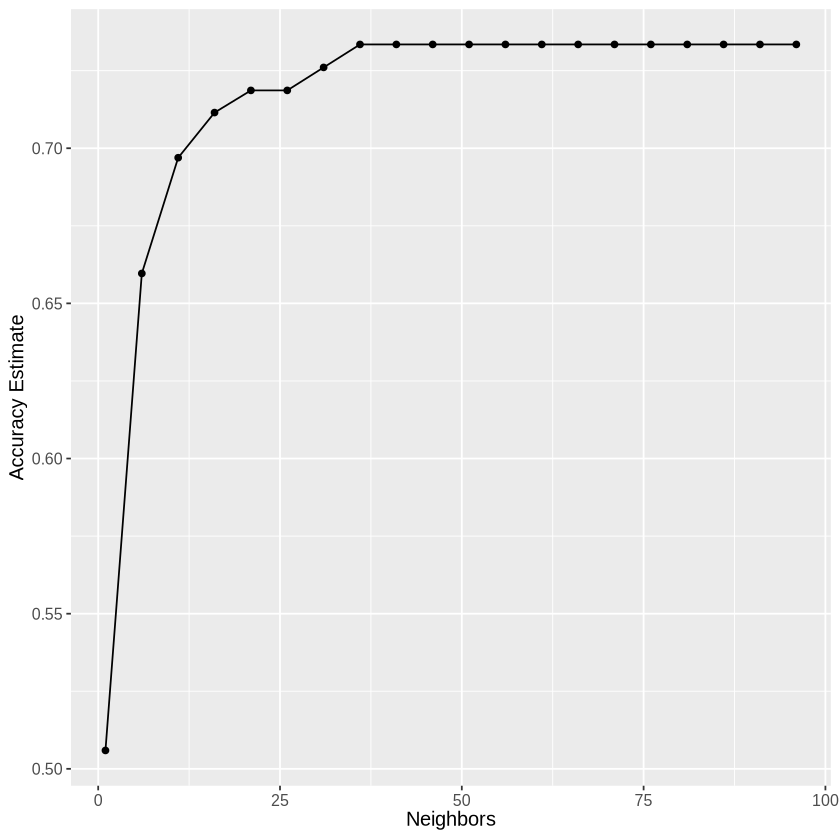

In [67]:
# Decide which number of neighbors is best by plotting the accuracy vs. K.
accuracy_vs_k <- knn_results |>
    ggplot(aes(x = neighbors, y = mean)) +
           geom_point() +
           geom_line() +
           labs(x = "Neighbors", y = "Accuracy Estimate") +
           theme(text = element_text(size = 12))
accuracy_vs_k

# Obtain the number of neighbors with the highest probability by computing.
best_k <- knn_results |>
    arrange(desc(mean)) |>
    head(1) |>
    pull(neighbors)
best_k

In [70]:
# Recompute accuracy statistics 
players_recipe <- recipe(subscribe ~ played_hours + Age, data = players_tidy) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors()) 

players_mode <- nearest_neighbor(weight_func = "rectangular", neighbors = 36) |>
    set_engine("kknn") |>
    set_mode("classification")

players_workflow <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_model) |>
    fit(data = players_tidy)

players_predictions <- predict(players_workflow, players_testing) |>
    bind_cols(players_testing)

accuracy <- players_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")
accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7288136


## Results

## Discussion